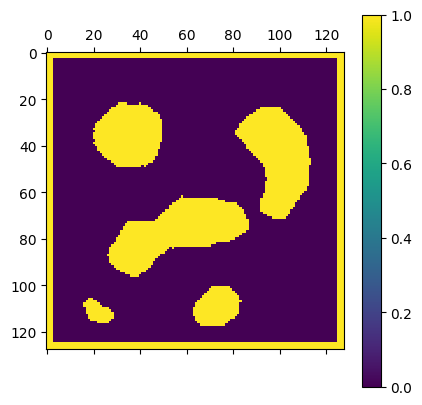

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from PIL import Image

from Point import Point

# Load grid map
image = Image.open("map0.png").convert("L")
grid_map = np.array(image.getdata()).reshape(image.size[0], image.size[1]) / 255
# binarize the image
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1
# Show grid map
plt.matshow(grid_map)
plt.colorbar()
plt.show()

def plot(grid_map, states, edges, path):
    plt.figure(figsize=(10, 10))
    plt.matshow(grid_map, fignum=0)
    for i,v in enumerate(states):
        plt.plot(v.y, v.x, "+w")
        plt.text(v.y, v.x, i, fontsize=14, color="w")

    for e in edges:
        plt.plot(
            [states[e[0]].y, states[e[1]].y],
            [states[e[0]].x, states[e[1]].x],
            "--g",
        )

    for i in range(1, len(path)):
        plt.plot(
            [states[path[i - 1]].y, states[path[i]].y],
            [states[path[i - 1]].x, states[path[i]].x],
            "r",
        )
    # Start
    plt.plot(states[0].y, states[0].x, "r*")
    # Goal
    plt.plot(states[-1].y, states[-1].x, "g*")

path = []


def fill_path(vertices, edges):
    edges.reverse()
    path = [edges[0][1]]
    next_v = edges[0][0]
    i = 1
    while next_v != 0:
        while edges[i][1] != next_v:
            i += 1
        path.append(edges[i][1])
        next_v = edges[i][0]
    path.append(0)
    edges.reverse()
    path.reverse()
    return vertices, edges, path

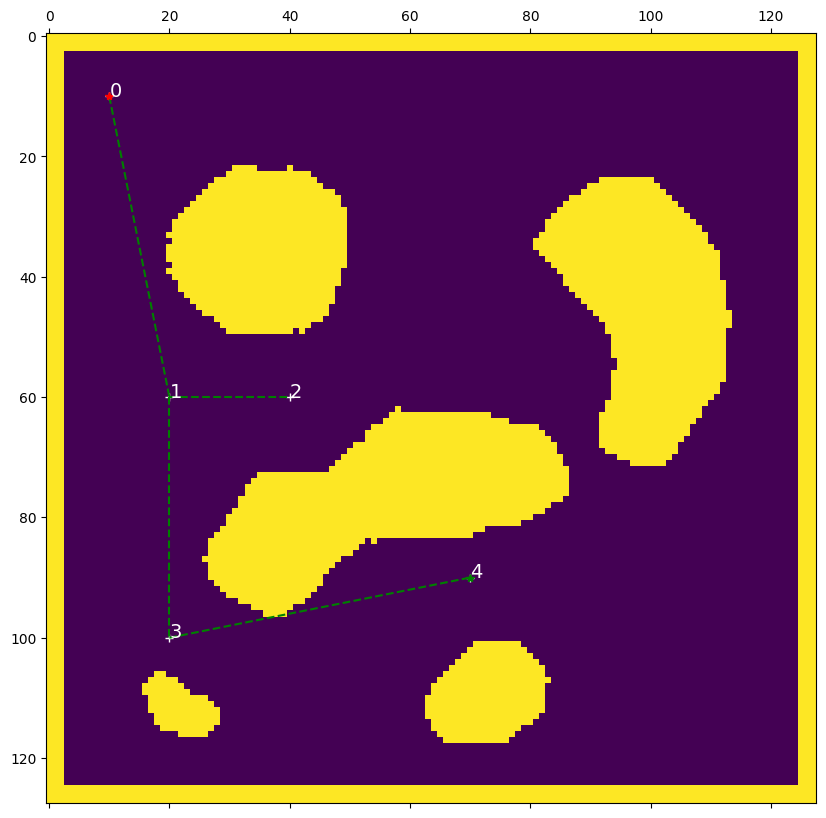

In [2]:
q_start = Point(10, 10)
q_goal = Point(90, 70)

states = [q_start]
edges = []

# RRT algorithm
q_dummy=Point(60,20)      # dummy1
states.append(q_dummy)

q_dummy = Point(60, 40)  # dummy2
states.append(q_dummy)

q_dummy = Point(100, 20)  # dummy3
states.append(q_dummy)

# list of states or vertices that make an edge
edges.append((0, 1))
edges.append((1, 2))
edges.append((1, 3))
edges.append((3, 4))
# RRT algorithm

states.append(q_goal)
path=[]

# _, _, path = fill_path(states, edges)
plot(grid_map, states, edges, path)